# Multivariate Regression

[multivariate regression vs multiple regression](https://stats.stackexchange.com/a/2363)

function: $MR= c_1 * x_1 + c_2 * x_2 + ... + c_n * x_n$

It's very possible that you have many feature variables. For example, to predict the weight, you might provide the information of 

- height
- age
- sleep hours

## One degree of multivariate regression

## Use linear regression 

We now have 2 features, so there are 2 variables$(x_1, x_2)$. And it's linear, so we won't have like $x^2$, etc

$y = constant+ a* x_1 + b* x_2$

In [1]:
import numpy as np

np.random.seed(1)
x_1 = np.absolute(np.random.randn(100) * 10)
x_2 = np.absolute(np.random.randn(100) * 30)
y = 2*x_1**2 + 3*x_1 + 2 + np.random.randn(100)*20

Text(0.5, 0.98, 'Origin data points')

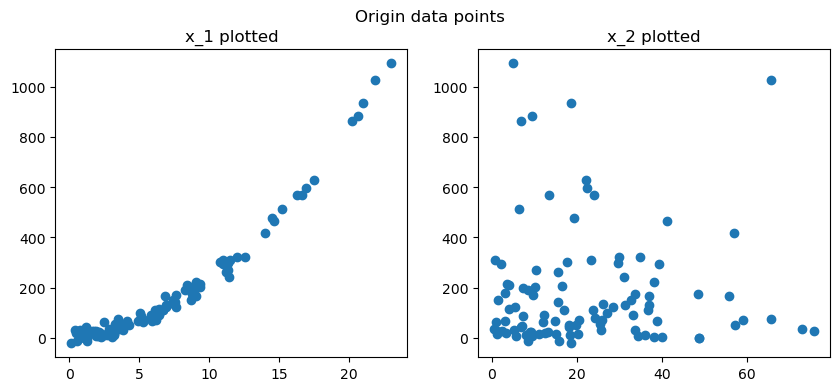

In [2]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
axes[0].scatter(x_1, y)
axes[1].scatter(x_2, y)
axes[0].set_title("x_1 plotted")
axes[1].set_title("x_2 plotted")
fig.suptitle("Origin data points")

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(np.vstack((x_1, x_2)).T, y, test_size=0.3, random_state=1)

lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train, y_train)

lin_reg_y_predicted = lin_reg_model.predict(X_test)

In [4]:
print(f"coef: {lin_reg_model.coef_}")
print(f"intercept: {lin_reg_model.intercept_}")
# function
print(f"y = {lin_reg_model.intercept_} + {lin_reg_model.coef_[0]} * x1 + \
{lin_reg_model.coef_[1]} * x2")

coef: [44.09490348  0.23140658]
intercept: -135.34790492219486
y = -135.34790492219486 + 44.09490348419605 * x1 + 0.23140658078404447 * x2


### Error by linear regression

In [5]:
from sklearn.metrics import mean_squared_error

np.sqrt(mean_squared_error(y_test, lin_reg_y_predicted))

68.677255206258

## Multivariate polynomial regression

2 features: $x_1, x_2$

Function: $y = c + w_1 x_1 + w_2 x_2 + w_3 {x_1}^2 + w_4 x_1 * x_2 + w_5 {x_2}^2$

The features of X have been transformed from $(x_1, x_2)$  to $(1, x_1, x_2, {x_1}^2, x_1 x_2, {x_2}^2)$ 

In [6]:
np.random.seed(1)
x_1 = np.absolute(np.random.randn(100) * 10)
x_2 = np.absolute(np.random.randn(100) * 30)
y = 2*x_1**2 + 3*x_1 + 2 + np.random.randn(100)*20

### Prepare the data by train-test split

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

features = np.vstack((x_1, x_2)).T

poly_features_transformer = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly_features_transformer.fit_transform(features)
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=1)

### Train the model

In [8]:
poly_2_feature_model = LinearRegression()
poly_2_feature_model.fit(X_train, y_train)

prediction = poly_2_feature_model.predict(X_test)

In [9]:
print(f"coef: {poly_2_feature_model.coef_}")
print(f"b: {poly_2_feature_model.intercept_}")

coef: [ 4.50744307 -0.65871652  1.87379682  0.01255865  0.01062419]
b: 6.806361225345768


### Error

In [10]:
from sklearn.metrics import mean_squared_error

np.sqrt(mean_squared_error(y_test, prediction))

18.959461842833374

The error is less in this model, so this one is preferred.